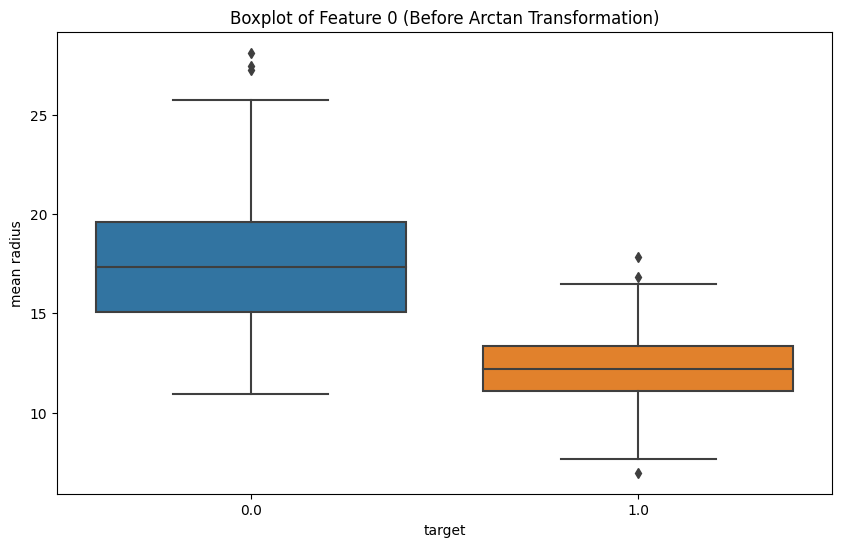

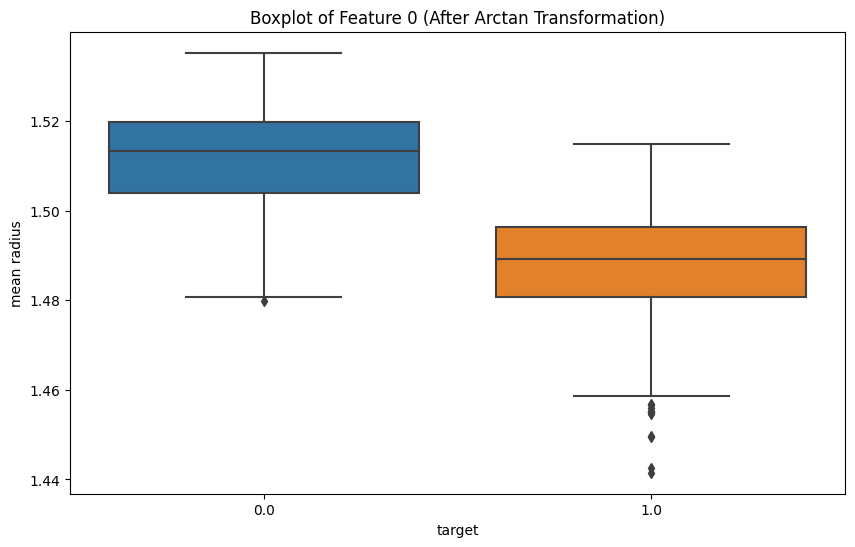


Unique classes in the training set: [0 1]
Unique classes in the testing set: [0 1]
K-Nearest Neighbors Accuracy (Arctan Transformation): 0.9386
Decision Tree Accuracy (Arctan Transformation): 0.9386
SVM Accuracy (Arctan Transformation): 0.9386


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


# Boxplot before Arctan Transformation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cancer, x='target', y=cancer.feature_names[0])
plt.title("Boxplot of Feature 0 (Before Arctan Transformation)")
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Arctan Transformation (manual implementation)
def arctan_transformation(feature):
    transformed_feature = np.arctan(feature)
    return transformed_feature

X_train_arctan = np.apply_along_axis(arctan_transformation, axis=0, arr=X_train)
X_test_arctan = np.apply_along_axis(arctan_transformation, axis=0, arr=X_test)

# Boxplot after Arctan Transformation
df_cancer_arctan = pd.DataFrame(np.c_[X_train_arctan, y_train], columns=np.append(cancer['feature_names'], ['target']))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cancer_arctan, x='target', y=cancer.feature_names[0])
plt.title("Boxplot of Feature 0 (After Arctan Transformation)")
plt.show()

# Check unique classes in the training and testing sets
print("\nUnique classes in the training set:", np.unique(y_train))
print("Unique classes in the testing set:", np.unique(y_test))

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_arctan, y_train)
knn_predictions = knn_classifier.predict(X_test_arctan)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"K-Nearest Neighbors Accuracy (Arctan Transformation): {knn_accuracy:.4f}")

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_arctan, y_train)
dt_predictions = dt_classifier.predict(X_test_arctan)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy (Arctan Transformation): {dt_accuracy:.4f}")

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_arctan, y_train)
svm_predictions = svm_classifier.predict(X_test_arctan)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy (Arctan Transformation): {svm_accuracy:.4f}")
